<a href="https://colab.research.google.com/github/zhaojin-2001/MMO/blob/main/lab3_MMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Экспериментальное введение и требования**

**Цель лабораторной работы:** изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

**Требования к отчету:**
Отчет по лабораторной работе должен содержать:

1.   титульный лист;
2.   описание задания;
3.   текст программы;
4.   экранные формы с примерами выполнения программы.

**Задание:**
1.   Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
2.   Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
*   масштабирование признаков (не менее чем тремя способами);
*   обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
*   обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
*   отбор признаков:
   один метод из группы методов фильтрации (filter methods);
   один метод из группы методов обертывания (wrapper methods);
   один метод из группы методов вложений (embedded methods).

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0

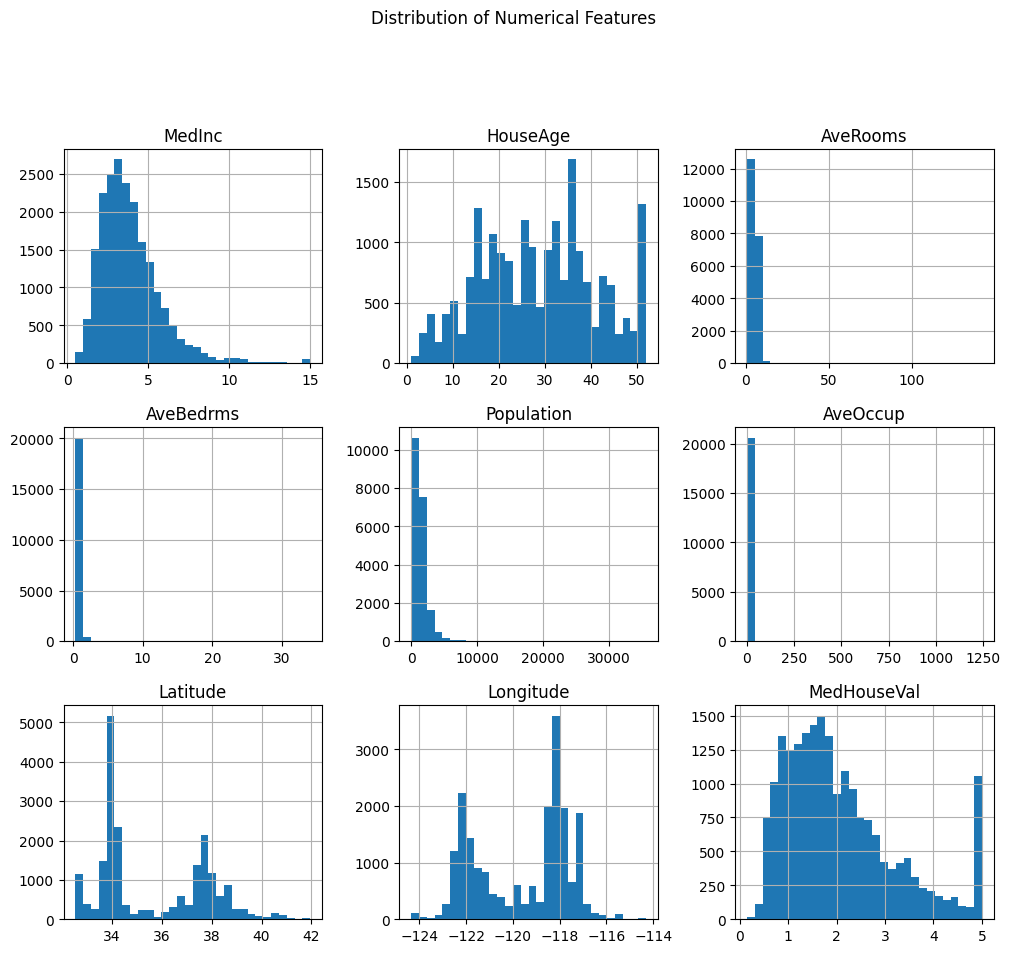

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# 加载数据
data = fetch_california_housing(as_frame=True)
df = data.frame
df['MedHouseVal'] = data.target

# 数据摘要
print("Data Summary:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# 数值型特征分布直方图
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

# **обработку выбросов для числовых признаков**

Далее мы выбираем числовые признаки для экспериментальной манипуляции. Мы исключаем широту и долготу, а также целевой признак: MedHouseVal

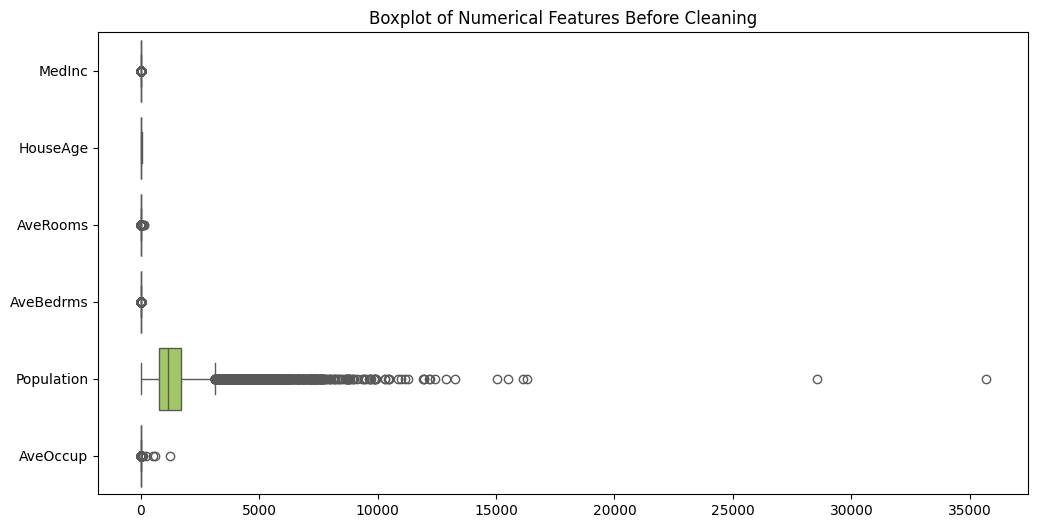

Number of outliers detected by Z-Score: 846
Original data size: 20640, Cleaned data size: 19794


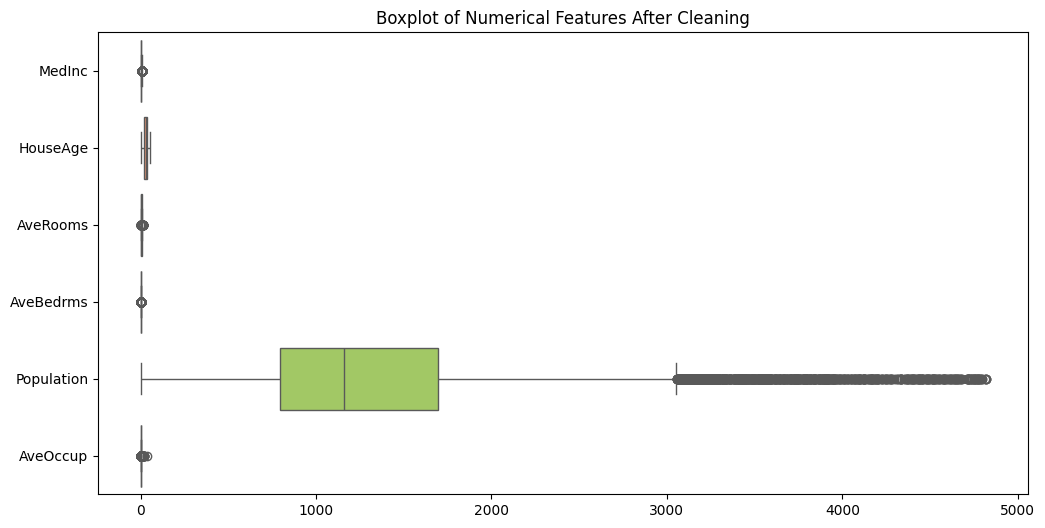

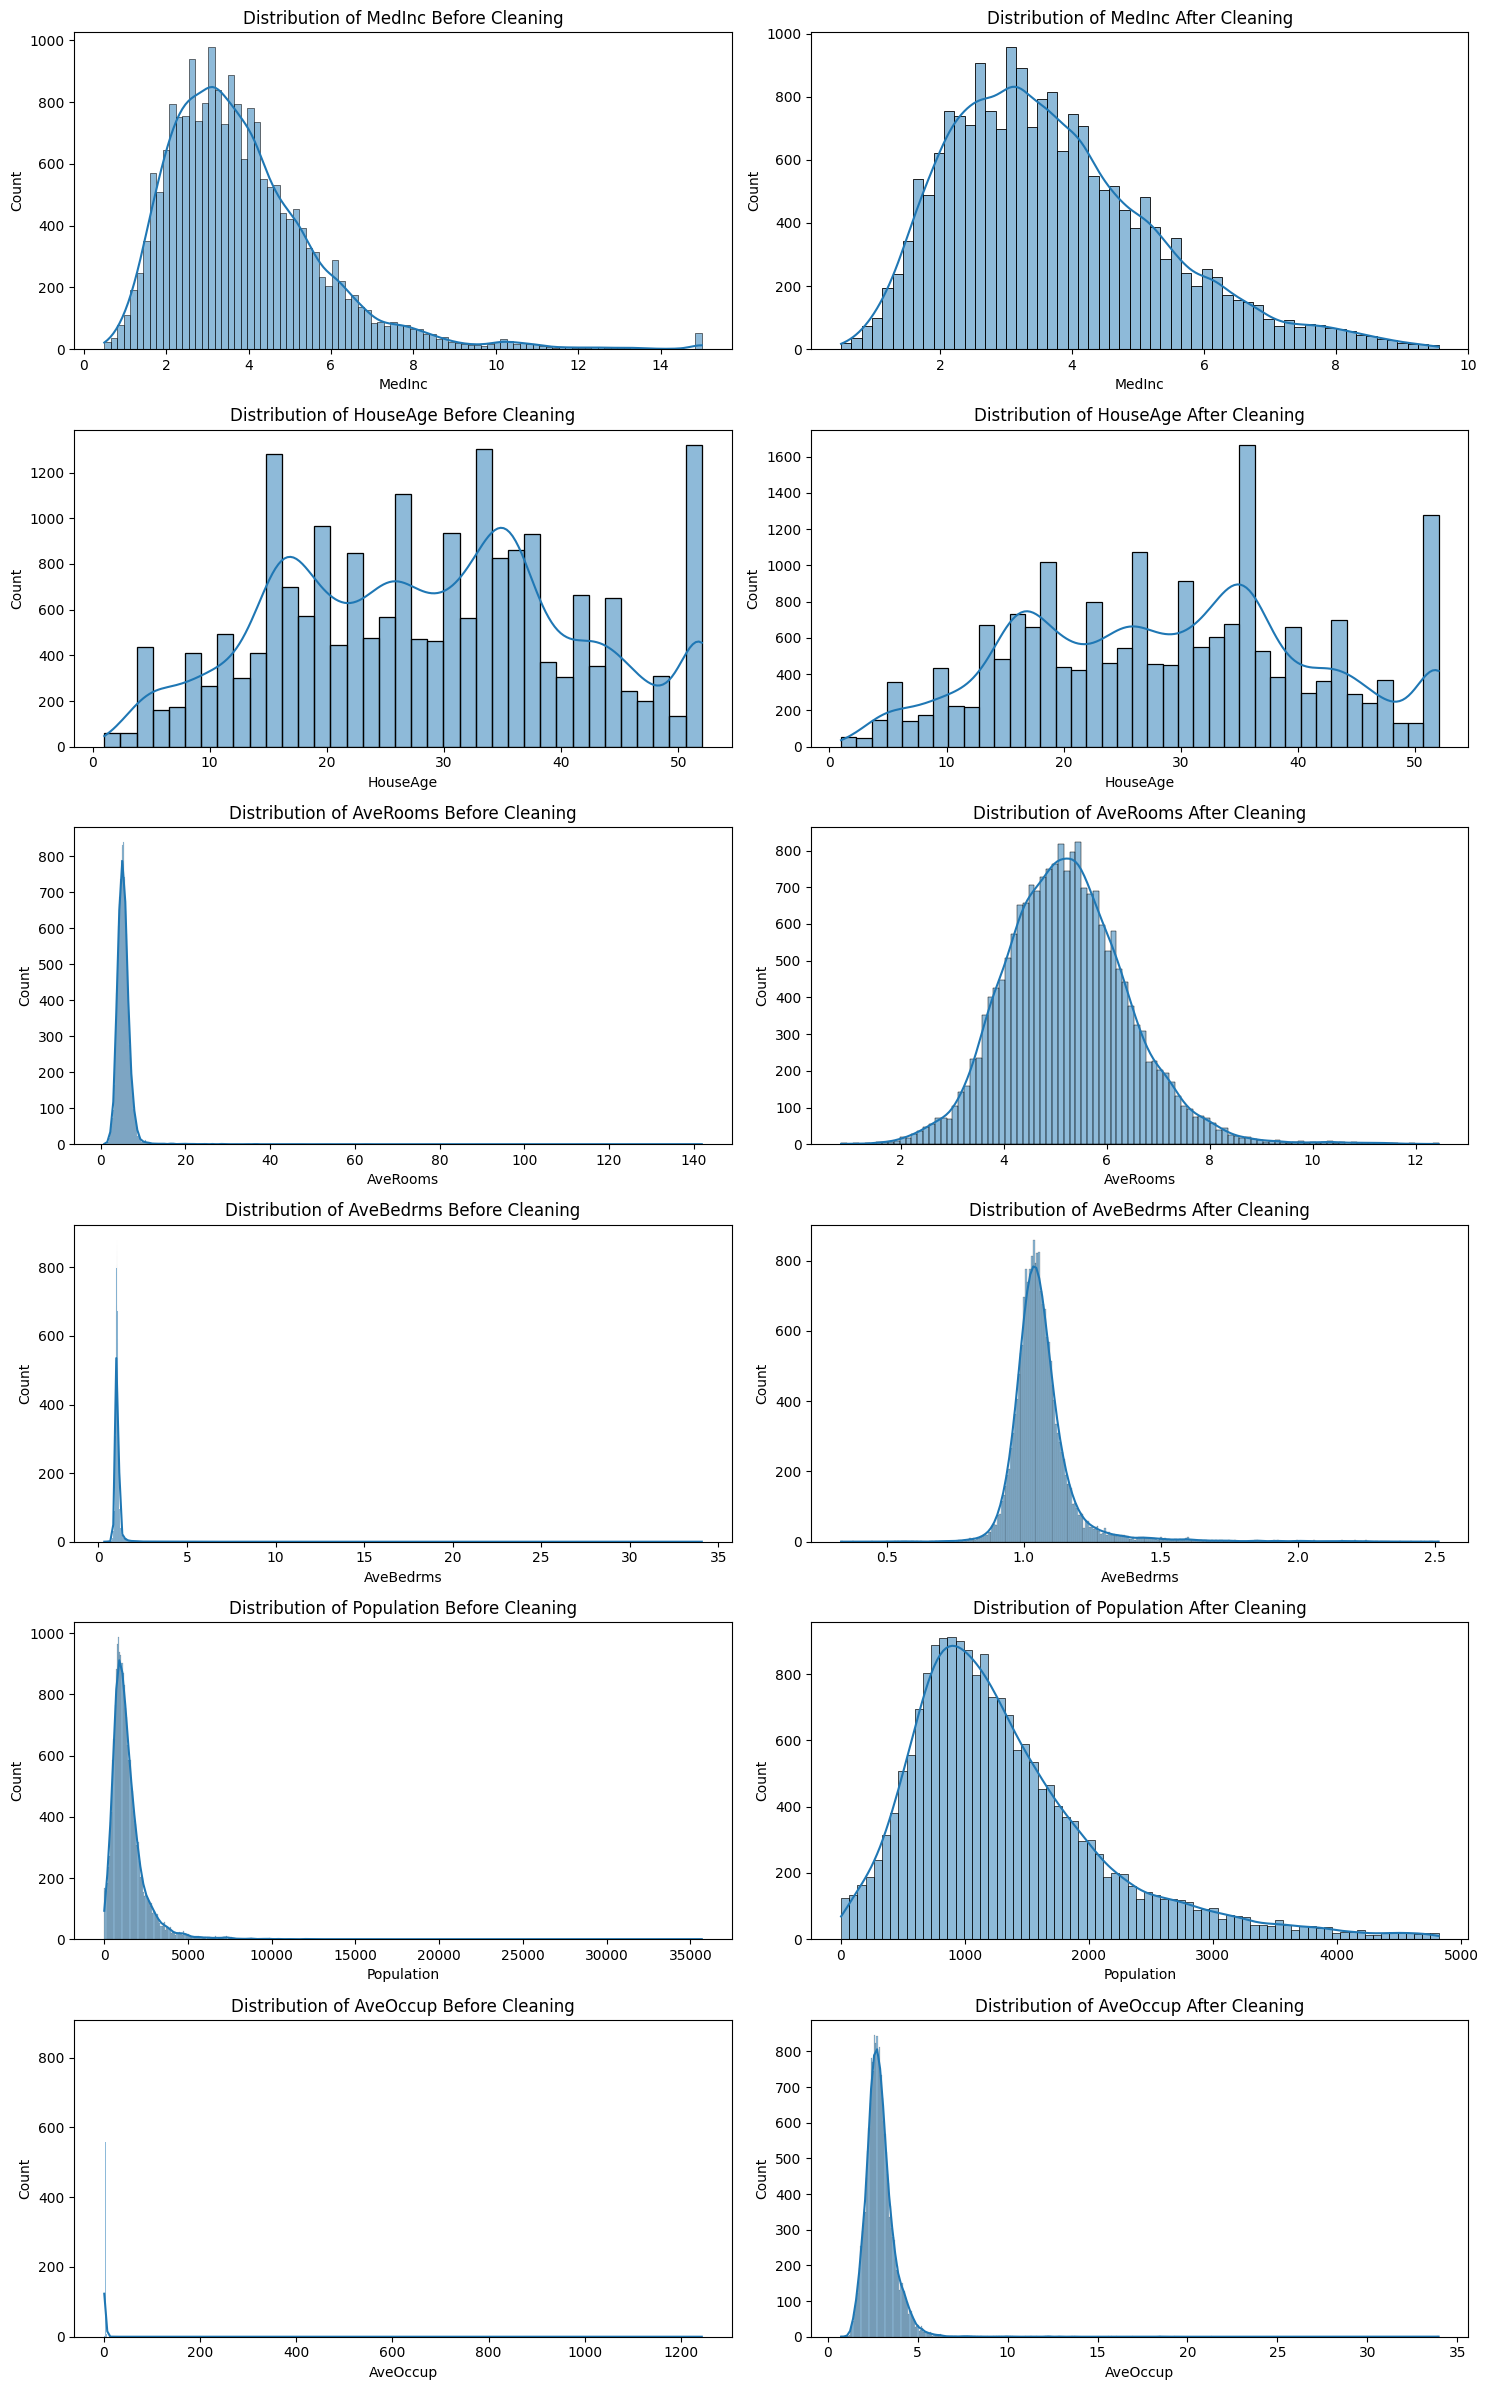

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 定义数值特征
numeric_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

# 绘制清洗前的箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_features], orient='h', palette='Set2')
plt.title('Boxplot of Numerical Features Before Cleaning')
plt.show()

# Z-Score 异常值检测
z_scores = np.abs(stats.zscore(df[numeric_features]))
outliers_z = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected by Z-Score: {outliers_z.sum()}")

# IQR 数据清洗
df_clean = df[~outliers_z]
print(f"Original data size: {len(df)}, Cleaned data size: {len(df_clean)}")

# 绘制清洗后的箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[numeric_features], orient='h', palette='Set2')
plt.title('Boxplot of Numerical Features After Cleaning')
plt.show()

# 绘制清洗前后对比图
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=2, figsize=(15, 4*len(numeric_features)))
for i, feature in enumerate(numeric_features):
    # 清洗前的分布
    sns.histplot(df[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of {feature} Before Cleaning')

    # 清洗后的分布
    sns.histplot(df_clean[feature], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Distribution of {feature} After Cleaning')

plt.tight_layout()
plt.show()

# **масштабирование признаков (не менее чем тремя способами)**

Далее мы выбираем числовые признаки для масштабирования признаков. Мы исключаем широту и долготу и целевые признаки: MedHouseVal.Мы динамически выбираем лучший метод масштабирования на основе распределения каждой функции и используем графики плотности ядра (KDE) для визуального сравнения изменений распределения до и после масштабирования.

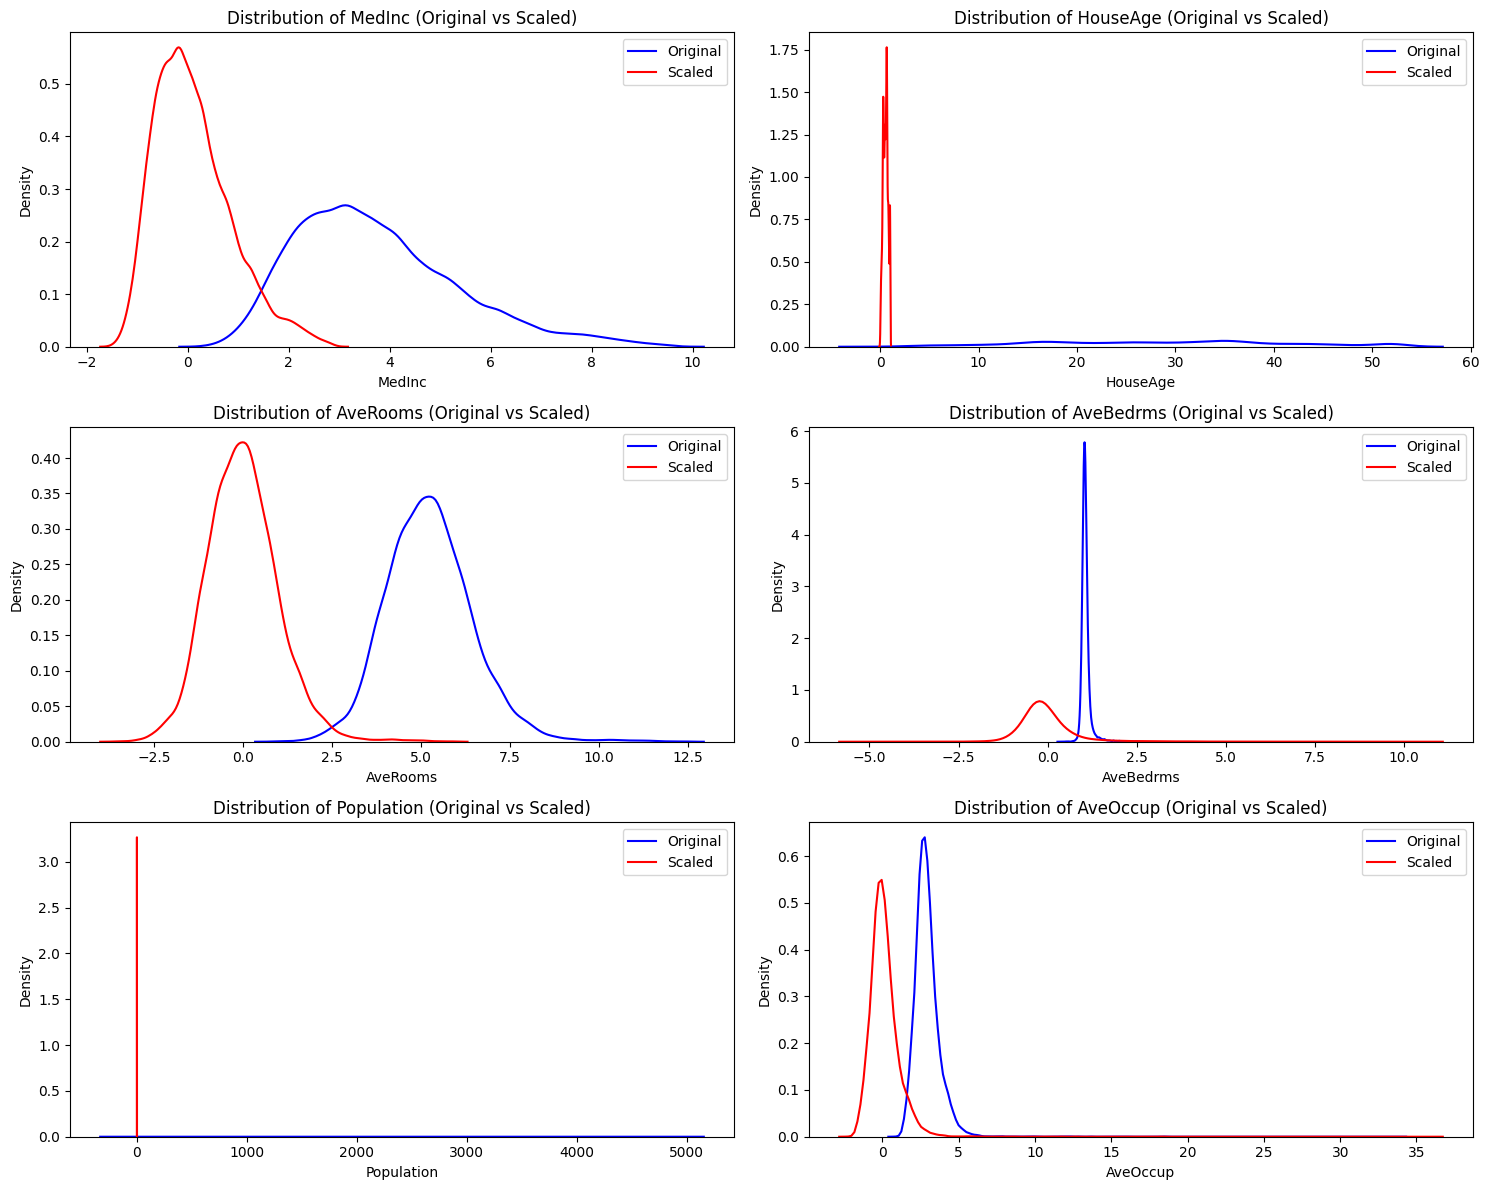

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 根据特征分布选择缩放器
scaler_dict = {
    'MedInc': RobustScaler(),  # 右偏且存在异常值
    'HouseAge': MinMaxScaler(),  # 范围有限，适合归一化
    'AveRooms': StandardScaler(),  # 近似正态分布
    'AveBedrms': StandardScaler(),
    'Population': MinMaxScaler(),  # 右偏 无论使用哪种都是这个图
    'AveOccup': RobustScaler()
}

# 动态缩放
df_scaled = df_clean.copy()
for col, scaler in scaler_dict.items():
    df_scaled[col] = scaler.fit_transform(df_clean[[col]])

# 对比缩放前后分布
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
for i, col in enumerate(numeric_features):
    sns.kdeplot(df_clean[col], ax=axes[i//2, i%2], label='Original', color='blue')
    sns.kdeplot(df_scaled[col], ax=axes[i//2, i%2], label='Scaled', color='red')
    axes[i//2, i%2].set_title(f'Distribution of {col} (Original vs Scaled)')  # 英文标题
    axes[i//2, i%2].legend()
plt.tight_layout()
plt.show()

После масштабирования функция «Население» меняется с горизонтальной линии на вертикальную, поэтому мы рассмотрим эту функцию подробно. Мы обнаружили, что характеристика популяции представляет собой типичное распределение с правым скосом. Использование StandardScaler или MinMaxScaler может усилить влияние выбросов, в результате чего масштабированное распределение станет вертикальной линией.

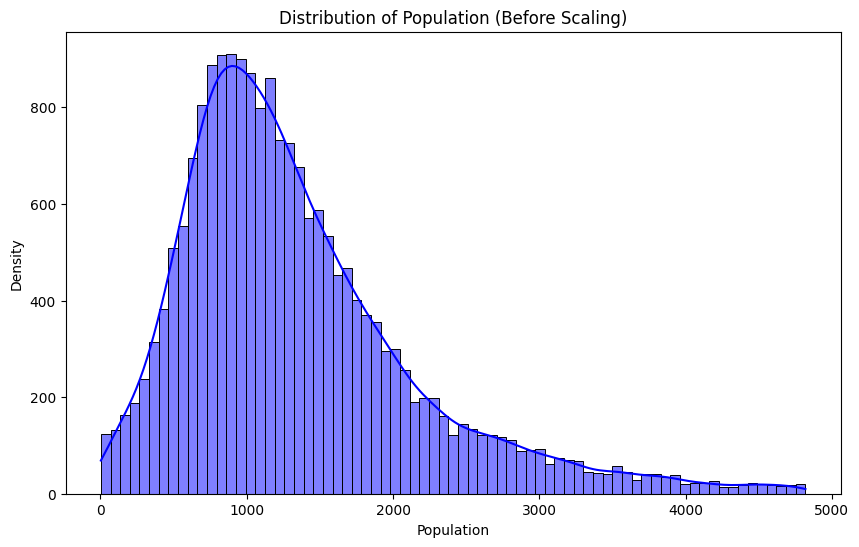

In [ ]:
# 检查 Population 特征的分布
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Population'], kde=True, color='blue')
plt.title('Distribution of Population (Before Scaling)')
plt.xlabel('Population')
plt.ylabel('Density')
plt.show()

Для распределения населения с правым скосом мы сначала выполним логарифмическое преобразование, а затем масштабируем его с помощью RobustScaler.

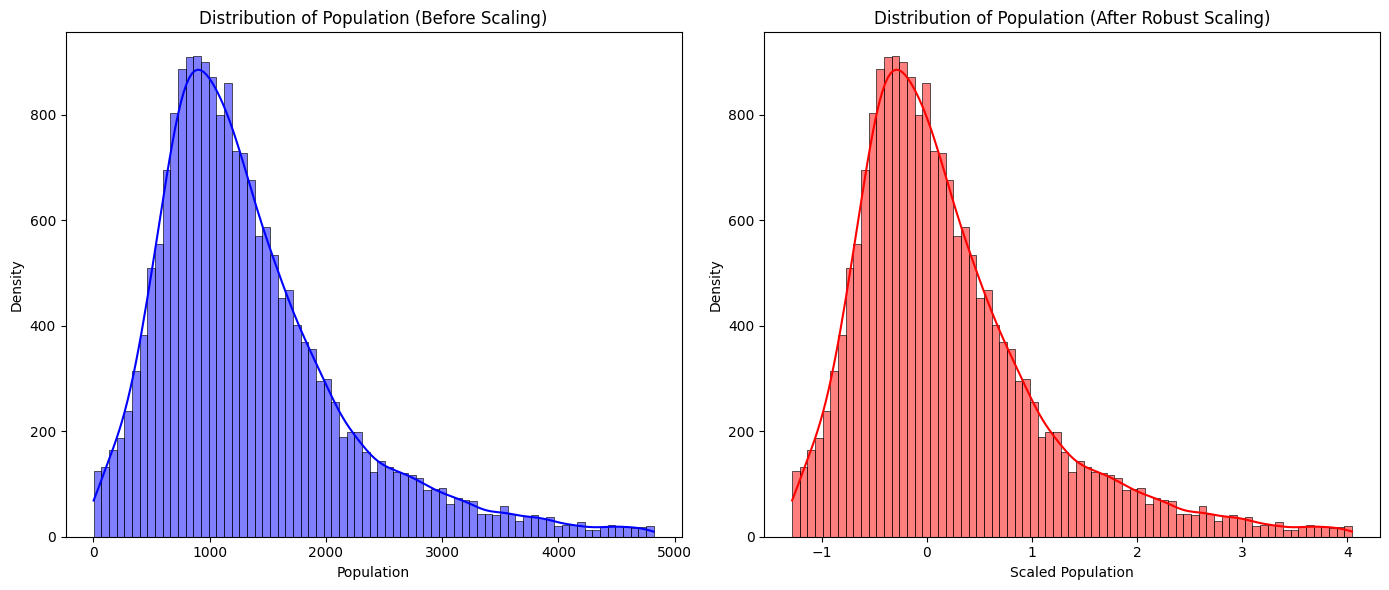

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# 1. 对数变换（动态处理右偏分布）
df_clean['Population_log'] = np.log1p(df_clean['Population'])

# 2. 动态缩放（根据特征分布选择缩放器）
scaler_dict = {
    'Population': RobustScaler()  # 使用 RobustScaler 处理右偏分布
}

# 动态缩放
df_scaled = df_clean.copy()
for col, scaler in scaler_dict.items():
    df_scaled[col] = scaler.fit_transform(df_clean[[col]])

# 3. 对比缩放前后分布
plt.figure(figsize=(14, 6))

# 原始分布
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Population'], kde=True, color='blue', label='Original')
plt.title('Distribution of Population (Before Scaling)')
plt.xlabel('Population')
plt.ylabel('Density')

# 缩放后分布
plt.subplot(1, 2, 2)
sns.histplot(df_scaled['Population'], kde=True, color='red', label='Scaled')
plt.title('Distribution of Population (After Robust Scaling)')
plt.xlabel('Scaled Population')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# **обработку по крайней мере одного нестандартного признака**

Здесь мы хотим преобразовать долготу и широту в географические кластерные признаки, поэтому мы используем алгоритм кластеризации K-средних для кластеризации долготы и широты в наборе данных и визуализируем результаты кластеризации.

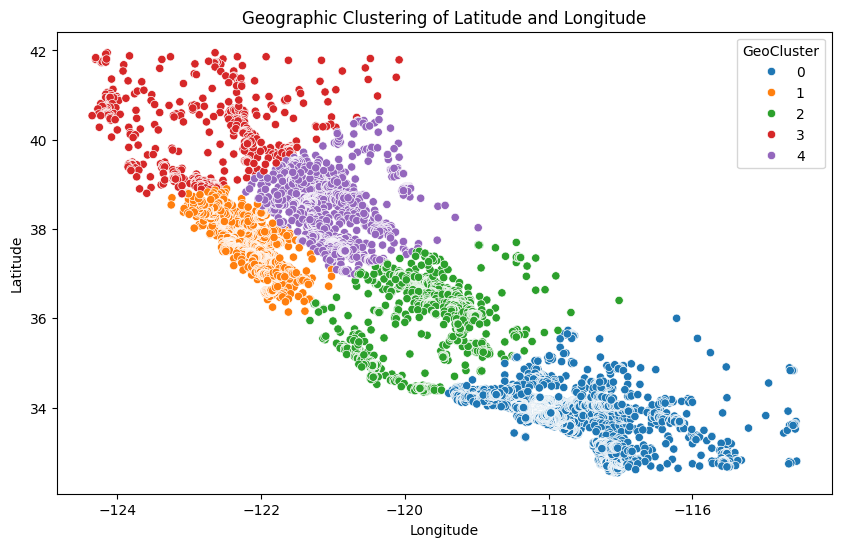

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 使用K-Means对经纬度聚类
coords = df_clean[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)

# 使用 .loc 来确保修改是在原始 DataFrame 上进行的
df_clean.loc[:, 'GeoCluster'] = kmeans.fit_predict(coords)

# 可视化聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='GeoCluster', data=df_clean, palette='tab10')
plt.title('Geographic Clustering of Latitude and Longitude')  # 英文标题
plt.xlabel('Longitude')  # 英文标签
plt.ylabel('Latitude')   # 英文标签
plt.show()

# 删除原始经纬度，保留聚类标签
df_processed = df_clean.drop(['Latitude', 'Longitude'], axis=1)

# **отбор признаков**

Мы использовали метод SelectKBest в методе фильтра в сочетании с функцией оценки f_regression, чтобы выбрать пять признаков с самой высокой корреляцией с целевой переменной MedHouseVal из набора данных и визуализировали оценки корреляции этих признаков.

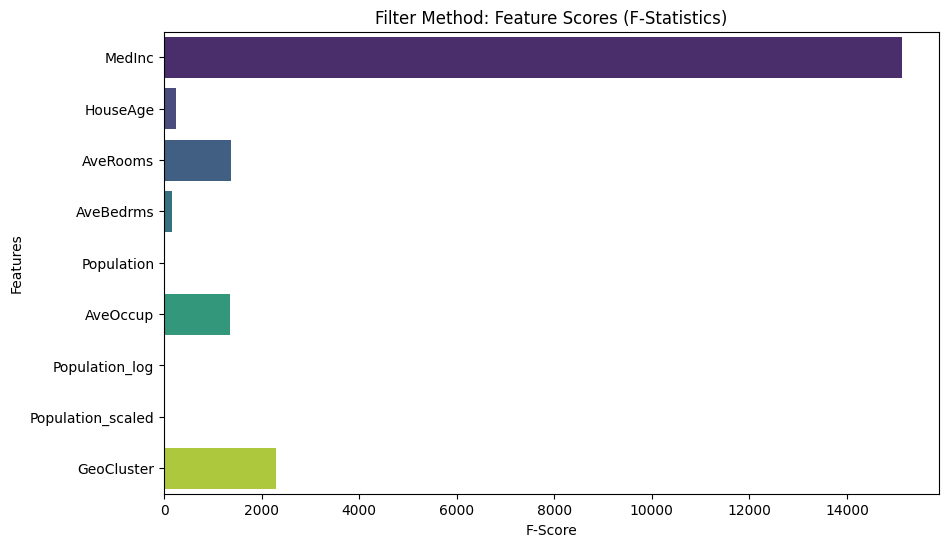

Selected features by Filter Method: ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'GeoCluster']


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

def filter_method_selection():
    # 特征选择
    selector_kbest = SelectKBest(score_func=f_regression, k=5)
    X_kbest = selector_kbest.fit_transform(df_processed.drop('MedHouseVal', axis=1), df_processed['MedHouseVal'])
    selected_features = df_processed.drop('MedHouseVal', axis=1).columns[selector_kbest.get_support()]

    # 可视化相关性分数
    scores = selector_kbest.scores_
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=scores,
        y=df_processed.drop('MedHouseVal', axis=1).columns,
        hue=df_processed.drop('MedHouseVal', axis=1).columns,  # 新增 hue
        palette='viridis',
        legend=False  # 禁用图例
    )
    plt.title('Filter Method: Feature Scores (F-Statistics)')
    plt.xlabel('F-Score')
    plt.ylabel('Features')
    plt.show()

    return selected_features

selected_kbest = filter_method_selection()
print("Selected features by Filter Method:", selected_kbest.tolist())

Здесь для выбора признаков используется регрессия Лассо во встроенном методе. Лассо-регрессия автоматически снижает коэффициенты некоторых признаков до 0 посредством регуляризации L1, тем самым достигая отбора признаков.

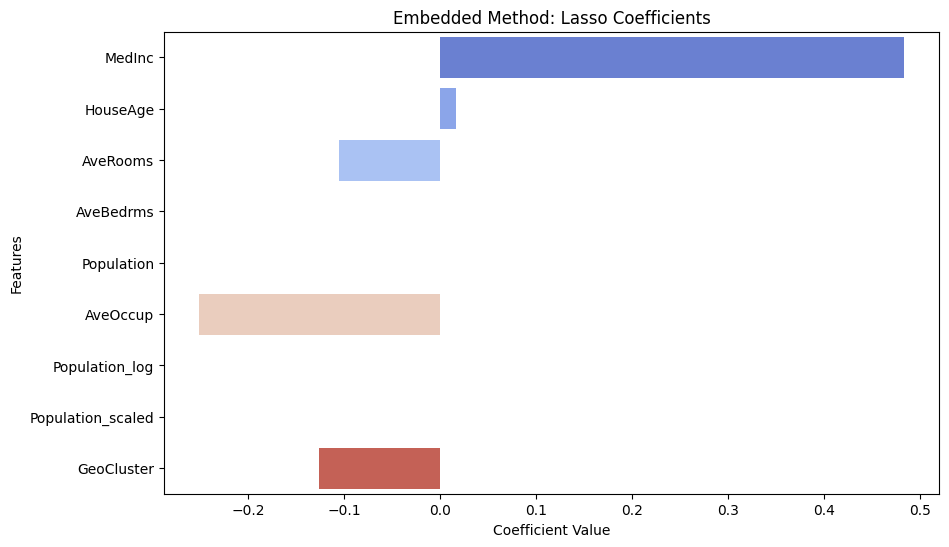

Selected features by Embedded Method: ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'GeoCluster']


In [ ]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import seaborn as sns

def embedded_method_selection():
    # 特征选择
    lasso = LassoCV(cv=5, max_iter=1000)
    lasso.fit(df_processed.drop('MedHouseVal', axis=1), df_processed['MedHouseVal'])
    selected_features = df_processed.drop('MedHouseVal', axis=1).columns[lasso.coef_ != 0]

    # 可视化Lasso系数
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=lasso.coef_,
        y=df_processed.drop('MedHouseVal', axis=1).columns,
        hue=df_processed.drop('MedHouseVal', axis=1).columns,  # 新增 hue
        palette='coolwarm',
        legend=False  # 禁用图例
    )
    plt.title('Embedded Method: Lasso Coefficients')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()

    return selected_features

selected_lasso = embedded_method_selection()
print("Selected features by Embedded Method:", selected_lasso.tolist())

Здесь мы используем метод случайного леса в обертке для оценки важности признаков и выбора признаков с показателями важности выше порогового значения.

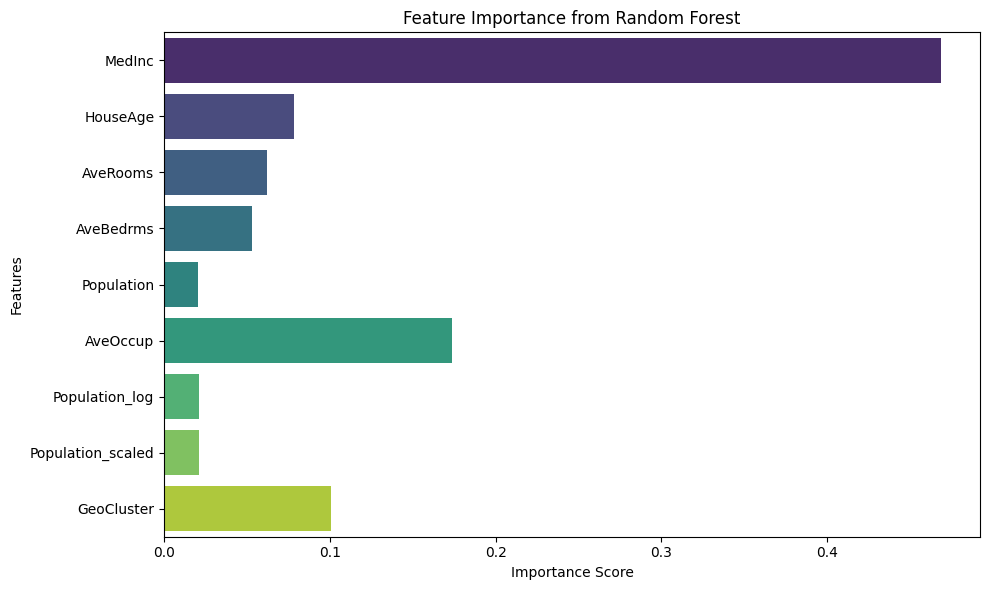

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 训练随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df_processed.drop('MedHouseVal', axis=1), df_processed['MedHouseVal'])
importance = rf.feature_importances_

# 可视化特征重要性
plt.figure(figsize=(10, 6))
sns.barplot(
    x=importance,
    y=df_processed.drop('MedHouseVal', axis=1).columns,
    hue=df_processed.drop('MedHouseVal', axis=1).columns,
    palette='viridis',
    legend=False
)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Мы оценим эффективность различных методов выбора признаков с помощью перекрестной проверки и сравним их эффективность при прогнозировании целевой переменной MedHouseVal.

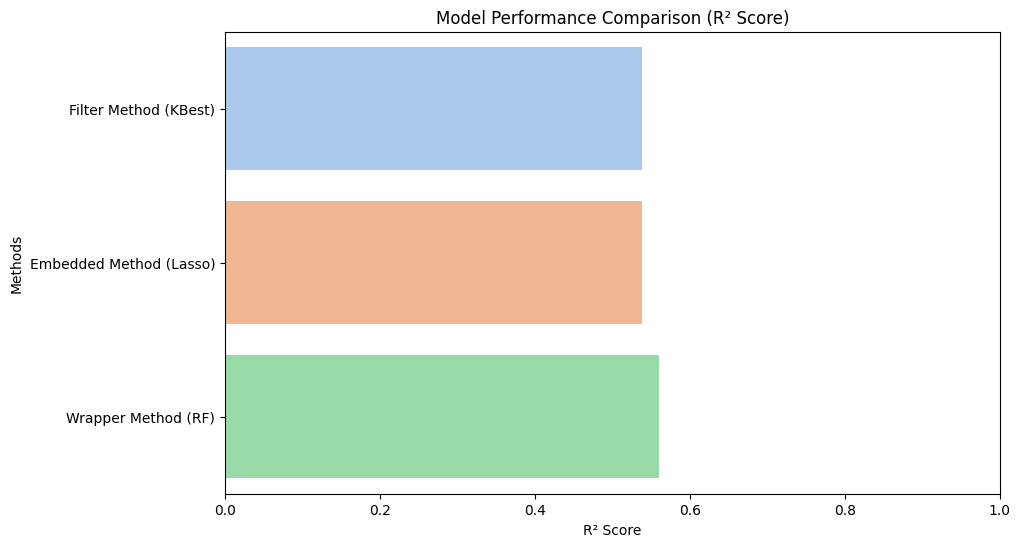

In [ ]:
from sklearn.model_selection import cross_val_score

# 交叉验证评估函数
def evaluate_features(features, model):
    X = df_processed[features]
    y = df_processed['MedHouseVal']
    return cross_val_score(model, X, y, cv=3, scoring='r2').mean()  # 减少交叉验证折数

# 使用轻量级模型评估
from sklearn.linear_model import Ridge

# 评估不同特征集
model = Ridge(alpha=1.0)  # 使用更快的线性模型
score_kbest = evaluate_features(selected_kbest, model)
score_lasso = evaluate_features(selected_lasso, model)
score_rf = evaluate_features(selected_rf, model)

# 结果对比
results = {
    'Filter Method (KBest)': score_kbest,
    'Embedded Method (Lasso)': score_lasso,
    'Wrapper Method (RF)': score_rf
}

# 可视化对比（修复 palette 警告）
plt.figure(figsize=(10, 6))
sns.barplot(
    x=list(results.values()),
    y=list(results.keys()),
    hue=list(results.keys()),  # 新增 hue 映射
    palette='pastel',
    legend=False                # 禁用冗余图例
)
plt.title('Model Performance Comparison (R² Score)')
plt.xlabel('R² Score')
plt.ylabel('Methods')           # 将 "Features" 改为更准确的 "Methods"
plt.xlim(0, 1)
plt.show()